# Laboratorio 1
Willy Tut

---

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('databici.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 1. ¿Qué rango de hora es la de mayor demanda?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E0873B948>]],
      dtype=object)

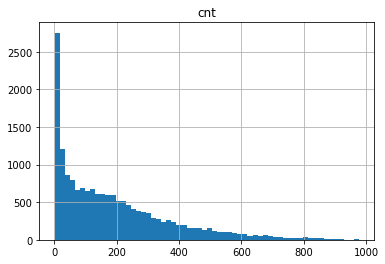

In [3]:
df.hist(column='cnt', bins=60)

In [4]:
df.groupby(['hr'])['cnt'].sum()#creando un subset agrupando por hora y suma de cnt


hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

El rango de hora es a las 17 horas

### 2. ¿Qué temporada es la mas alta?

In [26]:
df.groupby(['season'])['cnt'].sum()#agrupando la variable season y la suma de cnt

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

La temporada de mayor demanda es la 3

### 3. ¿Es la temperatura relevante para el modelo?

In [7]:
cor = df.corr(method="pearson")["temp"]["cnt"]
cor

0.4047722757786518

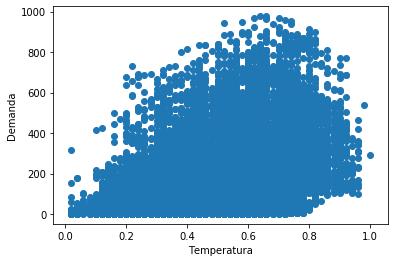

In [18]:
plt.scatter(df["temp"],df["cnt"])
plt.xlabel("Temperatura")
plt.ylabel("Demanda")
plt.show()

Como se observa en la gráfica anterior, las ventas se reducen a bajas y altas temperaturas, a pesar de que la correlación lineal es 0.40 lo cual se puede considerar como bajo


### 4. ¿Es la humedad relevante para el modelo?

In [20]:
cor = df.corr(method="pearson")["hum"]["cnt"]
cor

-0.3229107408245637

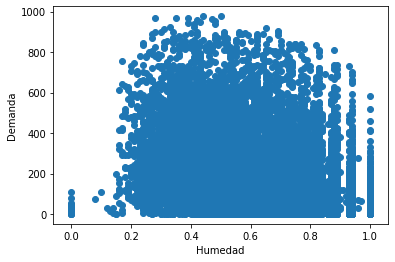

In [19]:
plt.scatter(df["hum"],df["cnt"])
plt.xlabel("Humedad")
plt.ylabel("Demanda")
plt.show()

Aparentemente, el clima tiene repercusiones sobre la demanda, ya que tanto en los extremos de la temperatura y la humedad, se observa una reducción de la demanda


## 5. Ajustar el modelo 

Ajustando medelo usando la temperatura como variable predictora

In [35]:
X = df['temp']
y = df['cnt']


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [54]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     2787.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:03:22   Log-Likelihood:                -90768.
No. Observations:               13903   AIC:                         1.815e+05
Df Residuals:                   13901   BIC:                         1.816e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5986      3.871     -0.413      0.6

Ajustando medelo utilizando humedad como variable predictora 

In [58]:
X = df['hum']
y = df['cnt']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [60]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1603.
Date:                Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:05:25   Log-Likelihood:                -91279.
No. Observations:               13903   AIC:                         1.826e+05
Df Residuals:                   13901   BIC:                         1.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.0216      4.969     76.279      0.0